# Using CNN for image classification using CIFAR-10 dataset

## Setup of Data Pipeline

In [ ]:
!pip install tensorflow opencv-python matplotlib

In [ ]:
import tensorflow as tf
import os

##Limit the GPU consumption by the program for avoiding error

In [ ]:
gpus=tf.config.experimental.list_physical_devices("GPU") # Stores a list of available GPUs in gpus
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True) # Limits the memory

In [ ]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Using CIFAR10 dataset

In [ ]:
(train_X,train_y),(val_X,val_y)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


## Reshaping train_y for our requirements


In [ ]:
train_X.shape, val_X.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
train_y.shape, val_y.shape

((50000, 1), (10000, 1))

As our X has around 32x32 images and in y we have only 1 column there needs to be reshaping done

In [ ]:
# This train_y is a 2D array, for our classification having a 1D array works as well
train_y=train_y.reshape(-1)
val_y=val_y.reshape(-1)

In [ ]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X,y,index):
    # Resizing the plot to look at image properly
    plt.figure(figsize=(15,2))
    # Looking at image
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])


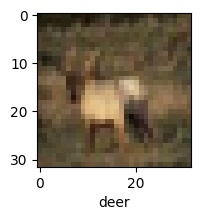

In [ ]:
plot_sample(train_X,train_y,3)

## The data has RGB channels i.e values from 0 to 255
## For simplification we can convert these to 0/1 i.e binary values by simply dividing by 255

In [ ]:
train_X=train_X/255
val_X=val_X/255

## Building a simple ANN model for image classification

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation="relu"),
    layers.Dense(2000, activation="relu"),
    layers.Dense(25, activation="relu"),
    layers.Dense(10, activation="softmax")
])

ann.compile(optimizer="SGD",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

ann.fit(train_X,train_y,epochs=7)

Epoch 1/7
1563/1563 [==============================] - 169s 108ms/step - loss: 1.8770 - accuracy: 0.3194
Epoch 2/7
1563/1563 [==============================] - 163s 104ms/step - loss: 1.6507 - accuracy: 0.4117
Epoch 3/7
1563/1563 [==============================] - 160s 102ms/step - loss: 1.5551 - accuracy: 0.4476
Epoch 4/7
1563/1563 [==============================] - 158s 101ms/step - loss: 1.4867 - accuracy: 0.4723
Epoch 5/7
1563/1563 [==============================] - 174s 111ms/step - loss: 1.4320 - accuracy: 0.4934
Epoch 6/7
1563/1563 [==============================] - 213s 136ms/step - loss: 1.3835 - accuracy: 0.5090
Epoch 7/7
1563/1563 [==============================] - 240s 154ms/step - loss: 1.3436 - accuracy: 0.5230


## Now to see how our model performs in prediction

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
predictions_y=ann.predict(val_X)
predn_classes=[np.argmax(element) for element in predictions_y]

print("Classification Report: \n",classification_report(val_y,predn_classes))

313/313 [==============================] - 10s 33ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.60      0.50      0.54      1000
           1       0.68      0.61      0.64      1000
           2       0.36      0.31      0.33      1000
           3       0.40      0.17      0.24      1000
           4       0.40      0.46      0.42      1000
           5       0.48      0.34      0.39      1000
           6       0.32      0.84      0.46      1000
           7       0.67      0.46      0.54      1000
           8       0.58      0.66      0.62      1000
           9       0.67      0.44      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.51      0.48      0.47     10000
weighted avg       0.51      0.48      0.47     10000



## Now using CNN to train our images

In [ ]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(10,activation="softmax")
])

In [ ]:
cnn.compile(optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])

In [ ]:
cnn.fit(train_X,train_y,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 58s 36ms/step - loss: 1.4804 - accuracy: 0.4613
Epoch 2/25
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1131 - accuracy: 0.6062
Epoch 3/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9755 - accuracy: 0.6581
Epoch 4/25
1563/1563 [==============================] - 56s 36ms/step - loss: 0.8913 - accuracy: 0.6886
Epoch 5/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.8253 - accuracy: 0.7136
Epoch 6/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7712 - accuracy: 0.7319
Epoch 7/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.7234 - accuracy: 0.7484
Epoch 8/25
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6852 - accuracy: 0.7600
Epoch 9/25
1563/1563 [==============================] - 61s 39ms/step - loss: 0.6474 - accuracy: 0.7721
Epoch 10/25
1563/1563 [==============================] - 74s 48m

In [ ]:
cnn.evaluate(val_X,val_y)

313/313 [==============================] - 3s 11ms/step - loss: 1.4772 - accuracy: 0.6749


[1.477201223373413, 0.6748999953269958]

In [ ]:
y_pred=cnn.predict(val_X)

313/313 [==============================] - 3s 11ms/step


In [ ]:
y_pclass=[np.argmax(element) for element in y_pred]

In [ ]:
val_y[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_pclass[:5]

[3, 8, 8, 0, 6]